# Import libraries and data

In this section, we import the necessary libraries and load the data. We will also create a lookup table that stores the relationship between the material, sample number, and the file path to the corresponding CSV file.


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Specify the parent directory
parent_directory = os.path.expanduser("~/git_repo/materials_comparison/data")

# Create a lookup table (DataFrame) to store the relationship between the material, sample number, and file path
lookup_table = pd.DataFrame(columns=['Material', 'Sample_Number', 'File_Path'])

#define constant dimensions of the sample
sample_length = 8 #mm
sample_width = 3 #mm

# Iterate over each material folder in the parent directory
for material_folder in os.listdir(parent_directory):
    material = material_folder.lower()  # Convert to lowercase
    material_path = os.path.join(parent_directory, material_folder)

    # Check if the path is a directory
    if os.path.isdir(material_path):
        # Iterate over each sample folder in the material folder
        for sample_folder in os.listdir(material_path):
            sample_number = sample_folder.replace('Ecoflex', '').lower()  # Convert to lowercase
            sample_path = os.path.join(material_path, sample_folder)

            # Find the CSV file in the sample folder
            for file in os.listdir(sample_path):
                if file.endswith(".csv") and "Data" in file:
                    file_path = os.path.join(sample_path, file)
                    # Append the information to the lookup table
                    row_df = pd.DataFrame([{'Material': material, 'Sample_Number': sample_number, 'File_Path': file_path}])
                    lookup_table = pd.concat([lookup_table, row_df], ignore_index=True)

lookup_table


,Material,Sample_Number,File_Path
0,eco-dra-soma,159,/home/trevor/git_repo/materials_comparison/dat...
1,eco-dra-soma,161,/home/trevor/git_repo/materials_comparison/dat...
2,eco-dra-soma,163,/home/trevor/git_repo/materials_comparison/dat...
3,eco-dra-soma,162,/home/trevor/git_repo/materials_comparison/dat...
4,eco-dra-soma,160,/home/trevor/git_repo/materials_comparison/dat...
...,...,...,...
117,gel-eco,125,/home/trevor/git_repo/materials_comparison/dat...
118,gel-eco,129,/home/trevor/git_repo/materials_comparison/dat...
119,gel-eco,128,/home/trevor/git_repo/materials_comparison/dat...
120,gel-eco,126,/home/trevor/git_repo/materials_comparison/dat...


In [2]:
import pandas as pd
import numpy as np
import os

# Specify the parent directory and Excel file path
parent_directory = os.path.expanduser("~/git_repo/materials_comparison/data")
xlsx_file_path = os.path.join(parent_directory, "Thickness of Silicone Dog Bone Samples.xlsx")

# Read the Excel file into a pandas DataFrame
thickness_df = pd.read_excel(xlsx_file_path, header=None)

# Initialize a dictionary to hold DataFrames for each material
material_dfs = {}

# Initialize a variable to hold the current material
current_material = None

# Initialize an empty DataFrame to hold the sample data for the current material
current_df = pd.DataFrame()

# Iterate over the DataFrame
for _, row in thickness_df.iterrows():
    # Check if the current row represents a material header
    if pd.isna(row[1]) and isinstance(row[0], str):
        # If this is not the first material, add the previous DataFrame to the dictionary
        if not current_df.empty:
            material_dfs[current_material] = current_df

        # Update the current material and initialize a new DataFrame
        current_material = row[0].lower()  # Convert to lowercase
        current_df = pd.DataFrame(columns=['Sample', 'Thickness'])

    # Check if the current row represents sample data
    elif isinstance(row[0], str) and not pd.isna(row[1]):
        # Extract the sample number and thickness
        sample_number = row[0].split('-')[0].replace('Ecoflex', '').zfill(3)
        thickness = row[1]

        # Append the data to the current DataFrame
        current_df = pd.concat([current_df, pd.DataFrame({'Sample': [sample_number], 'Thickness': [thickness]})], ignore_index=True)

# Don't forget to add the last material's DataFrame to the dictionary
if not current_df.empty:
    material_dfs[current_material] = current_df

# Concatenate the DataFrames in the dictionary into a single DataFrame
thickness_df = pd.concat(material_dfs, names=['Material', 'Index'])

# Reset the index
thickness_df.reset_index(level=0, inplace=True)

# Now, thickness_df should be in the desired format
thickness_df


,Material,Sample,Thickness
Index,,,
0,dragon-sil,076,2.90
1,dragon-sil,077,2.85
2,dragon-sil,078,2.80
3,dragon-sil,079,2.86
4,dragon-sil,080,2.80
...,...,...,...
1,soma-gel,177,3.00
2,soma-gel,178,3.08
3,soma-gel,179,3.17


# Function: get_sample_info

The function get_sample_info is designed to retrieve and display information about a specific sample based on its sample number.
Parameters

The function takes two parameters:

    sample_number: The sample number as a string. For example, '001'.
    lookup_table: A pandas DataFrame that serves as a lookup table mapping material names to sample numbers and file paths.

## Process

The function begins by filtering the lookup table for the specific sample number. If no data is found for the given sample number, the function prints a message indicating this and returns None.

If data is found for the sample number, the function retrieves the material name and file path associated with the sample. It then reads the data from the file path into a DataFrame, stripping any leading or trailing spaces from the column names.
Output

The function prints the material group that the sample number belongs to and the DataFrame for this sample. It then returns the material name and DataFrame. If no data is found for the given sample number, the function returns None.
Example Usage


>get_sample_info('001', lookup_table)

This function call will print the material group that sample number '001' belongs to, display the DataFrame for this sample, and return the material name and DataFrame.

In [3]:
def get_sample_info(sample_number, lookup_table):
    # Filter the lookup table for the specific sample number
    sample_data = lookup_table[lookup_table['Sample_Number'] == sample_number]

    if len(sample_data) == 0:
        print(f"No data found for sample number {sample_number}.")
        return None

    material = sample_data['Material'].iloc[0]
    file_path = sample_data['File_Path'].iloc[0]

    df = pd.read_csv(file_path)  # Read in the data
    df.columns = df.columns.str.strip()  # Strip leading and trailing spaces from column names

    print(f"Sample number {sample_number} belongs to the material group: {material}")
    print("Here's the DataFrame for this sample:")
    print(df)

    return material, df

get_sample_info('134', lookup_table)



Sample number 134 belongs to the material group: pure gel
Here's the DataFrame for this sample:
                  SetName      Cycle  Time_S  Size_mm  Displacement_mm  \
0   Elongation till break  1-Preload    0.00   48.000            0.000   
1   Elongation till break  1-Preload    0.20   48.000            0.000   
2   Elongation till break  1-Preload    0.40   48.000            0.000   
3   Elongation till break  1-Stretch    0.41   48.000            0.000   
4   Elongation till break  1-Stretch    0.61   48.402            0.402   
5   Elongation till break  1-Stretch    0.81   48.883            0.883   
6   Elongation till break  1-Stretch    1.01   49.364            1.364   
7   Elongation till break  1-Stretch    1.21   49.845            1.845   
8   Elongation till break  1-Stretch    1.41   50.326            2.326   
9   Elongation till break  1-Stretch    1.61   50.807            2.807   
10  Elongation till break  1-Stretch    1.81   51.289            3.289   
11  Elongation t

('pure gel',
                   SetName      Cycle  Time_S  Size_mm  Displacement_mm  \
 0   Elongation till break  1-Preload    0.00   48.000            0.000   
 1   Elongation till break  1-Preload    0.20   48.000            0.000   
 2   Elongation till break  1-Preload    0.40   48.000            0.000   
 3   Elongation till break  1-Stretch    0.41   48.000            0.000   
 4   Elongation till break  1-Stretch    0.61   48.402            0.402   
 5   Elongation till break  1-Stretch    0.81   48.883            0.883   
 6   Elongation till break  1-Stretch    1.01   49.364            1.364   
 7   Elongation till break  1-Stretch    1.21   49.845            1.845   
 8   Elongation till break  1-Stretch    1.41   50.326            2.326   
 9   Elongation till break  1-Stretch    1.61   50.807            2.807   
 10  Elongation till break  1-Stretch    1.81   51.289            3.289   
 11  Elongation till break  1-Stretch    2.01   51.770            3.770   
 12  Elongat

# Process data based on sample number

In this section, we define a function that processes and plots the dataframes for a given material. The function reads in the data for each sample, appends the dataframe to the appropriate group in the groups dictionary, and plots the results.


In [4]:
gel_eco_thickness_data = thickness_df[thickness_df['Material'] == 'gel-eco']
print(gel_eco_thickness_data)


      Material Sample  Thickness
Index                           
0      gel-eco   125        2.68
1      gel-eco   126        2.56
2      gel-eco   127        2.73
3      gel-eco   128        2.57
4      gel-eco   129        2.60


In [5]:
def process_and_plot_dataframes(material, lookup_table, thickness_df):
    material_data = lookup_table[lookup_table['Material'] == material]
    thickness_df['Sample'] = thickness_df['Sample'].str.strip()

    fig_force_displacement = plt.figure(figsize=(10, 7))
    ax_force_displacement = fig_force_displacement.add_subplot(111)

    youngs_modulus_list = []
    sample_data = {}  # This will store stress and strain for each sample

    for _, row in material_data.iterrows():
        sample_number = row['Sample_Number']
        sample_number_str = str(sample_number).zfill(3) 
        file_path = row['File_Path']

        sample_thickness = thickness_df[(thickness_df['Material'] == material) & 
                                        (thickness_df['Sample'] == sample_number_str)]['Thickness'].values[0]

        df = pd.read_csv(file_path)  
        df.columns = df.columns.str.strip()

        df["Stress (MPa)"] = df["Force_N"] / (sample_thickness * sample_width)
        df["Strain"] = (sample_length + df["Displacement_mm"]) / sample_length

        stress = df["Stress (MPa)"].values
        strain = df["Strain"].values

        sample_data[sample_number_str] = {"stress": stress, "strain": strain}

        max_stress_index = df['Stress (MPa)'].idxmax()
        max_stress = df['Stress (MPa)'].max()
        strain_at_max_stress = df['Strain'][max_stress_index]
        strain_at_50_percent_stress = strain_at_max_stress / 2
        index_at_50_percent_stress = df['Strain'].sub(strain_at_50_percent_stress).abs().idxmin()
        stress_at_50_percent_stress = df['Stress (MPa)'][index_at_50_percent_stress]
        youngs_modulus = (max_stress - stress_at_50_percent_stress) / (strain_at_max_stress - strain_at_50_percent_stress)
        youngs_modulus_list.append(youngs_modulus)

        print(f"The Young's Modulus for sample number {sample_number} is {youngs_modulus} MPa")

        ax_force_displacement.plot(strain, stress, label=sample_number)

    ax_force_displacement.set_xlabel('Strain')
    ax_force_displacement.set_ylabel('Stress (MPa)')
    ax_force_displacement.set_title(f'Stress vs Strain for {material}')
    ax_force_displacement.legend()

    plt.show()

    youngs_modulus_mean = np.mean(youngs_modulus_list)
    youngs_modulus_std = np.std(youngs_modulus_list)
    print(f"The mean Young's Modulus for material {material} is {youngs_modulus_mean} MPa")
    print(f"The standard deviation of Young's Modulus for material {material} is {youngs_modulus_std} MPa")

    return sample_data, youngs_modulus_mean, youngs_modulus_std


The Young's Modulus for sample number 142 is 1.1081624116247335 MPa
The Young's Modulus for sample number 145 is 1.2488264096766994 MPa
The Young's Modulus for sample number 143 is 1.14405676969535 MPa
The Young's Modulus for sample number 146 is 1.2381721191094344 MPa
The Young's Modulus for sample number 144 is 1.3082082879029489 MPa


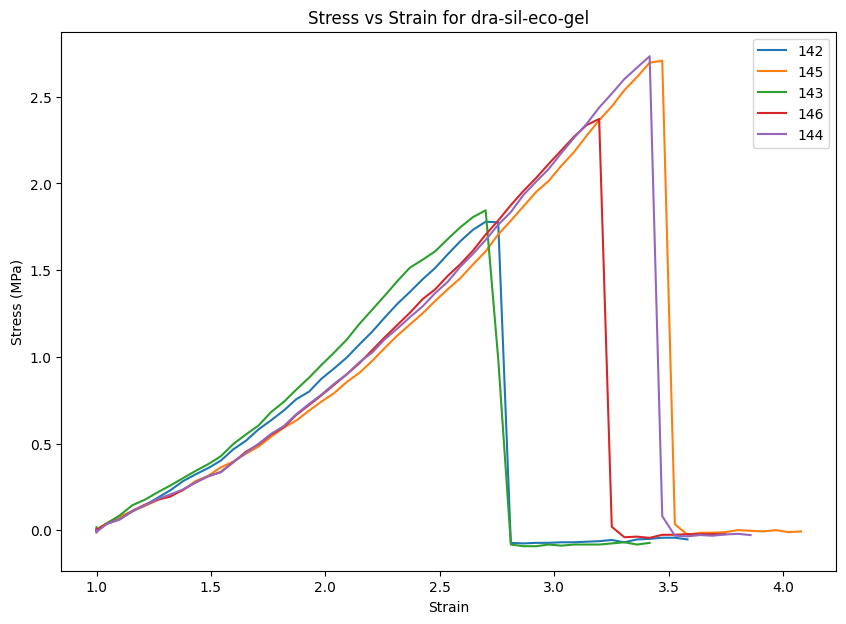

The mean Young's Modulus for material dra-sil-eco-gel is 1.2094851996018332 MPa
The standard deviation of Young's Modulus for material dra-sil-eco-gel is 0.07302616671875924 MPa
The Young's Modulus for sample number 157 is 1.5062991692798589 MPa
The Young's Modulus for sample number 153 is 1.06266943103305 MPa
The Young's Modulus for sample number 155 is 0.9971550110748173 MPa
The Young's Modulus for sample number 158 is 1.1708792903336127 MPa
The Young's Modulus for sample number 156 is 1.1812175602602066 MPa
The Young's Modulus for sample number 154 is 1.5685403143385284 MPa


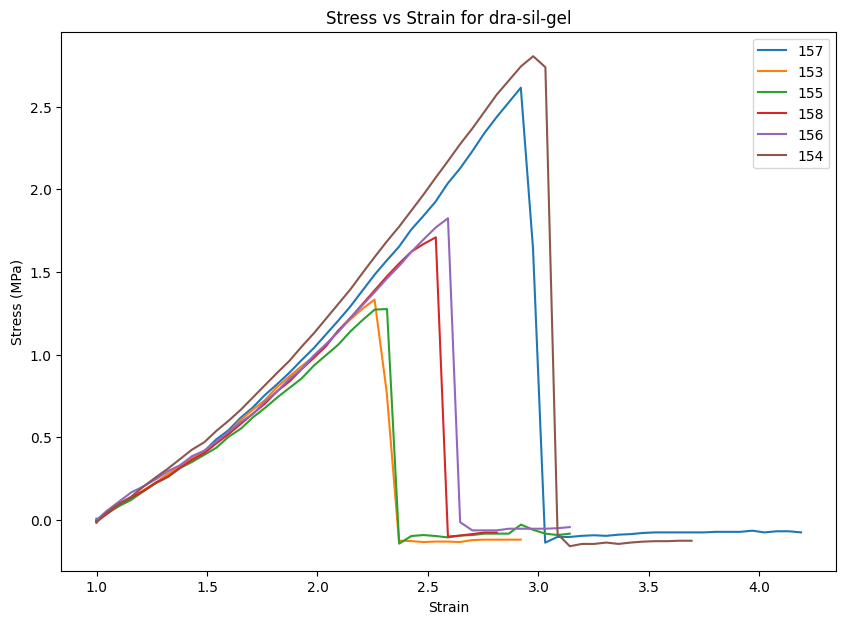

The mean Young's Modulus for material dra-sil-gel is 1.2477934627200122 MPa
The standard deviation of Young's Modulus for material dra-sil-gel is 0.21491952928191302 MPa
The Young's Modulus for sample number 175 is 0.5902522649173964 MPa
The Young's Modulus for sample number 171 is 0.5784730219513742 MPa
The Young's Modulus for sample number 174 is 0.6897112144306564 MPa
The Young's Modulus for sample number 173 is 0.6127972492212368 MPa
The Young's Modulus for sample number 172 is 0.6394612074336121 MPa
The Young's Modulus for sample number 170 is 0.5662754370423956 MPa


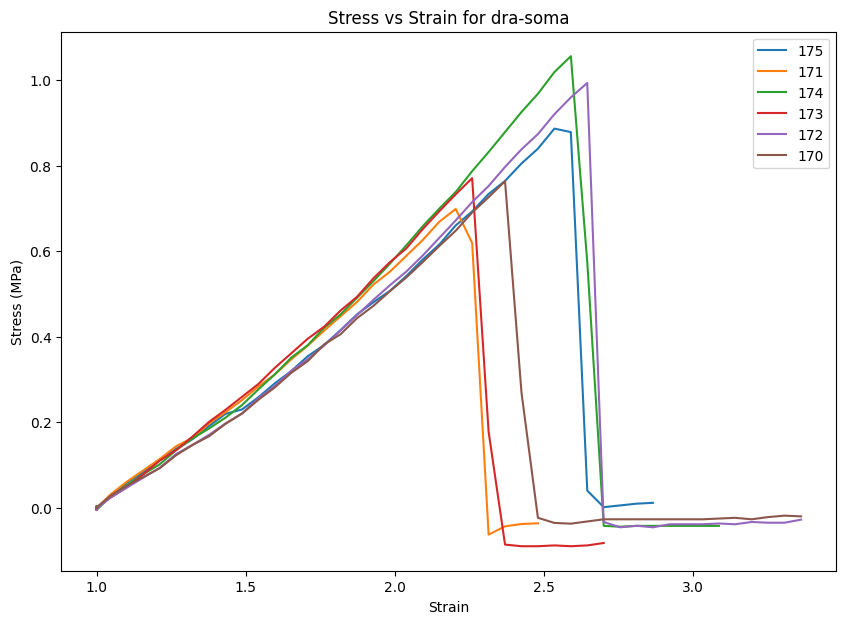

The mean Young's Modulus for material dra-soma is 0.612828399166112 MPa
The standard deviation of Young's Modulus for material dra-soma is 0.04178801022863234 MPa
The Young's Modulus for sample number 123 is 0.3244436780937661 MPa
The Young's Modulus for sample number 122 is 0.282945028184418 MPa
The Young's Modulus for sample number 120 is 0.3708039565683141 MPa
The Young's Modulus for sample number 121 is 0.2855768607352925 MPa
The Young's Modulus for sample number 124 is 0.30275940045749217 MPa


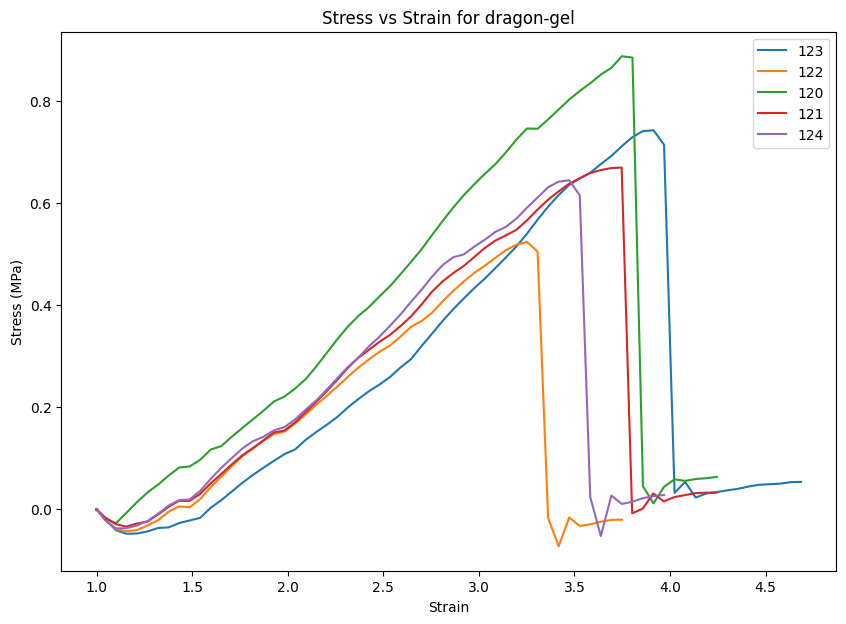

The mean Young's Modulus for material dragon-gel is 0.31330578480785654 MPa
The standard deviation of Young's Modulus for material dragon-gel is 0.03234806769647513 MPa
The Young's Modulus for sample number 137 is 0.9852474599706182 MPa
The Young's Modulus for sample number 135 is 1.4702679303913446 MPa
The Young's Modulus for sample number 139 is 1.5133914017696026 MPa
The Young's Modulus for sample number 136 is 1.377556793125045 MPa
The Young's Modulus for sample number 138 is 1.299522056365898 MPa


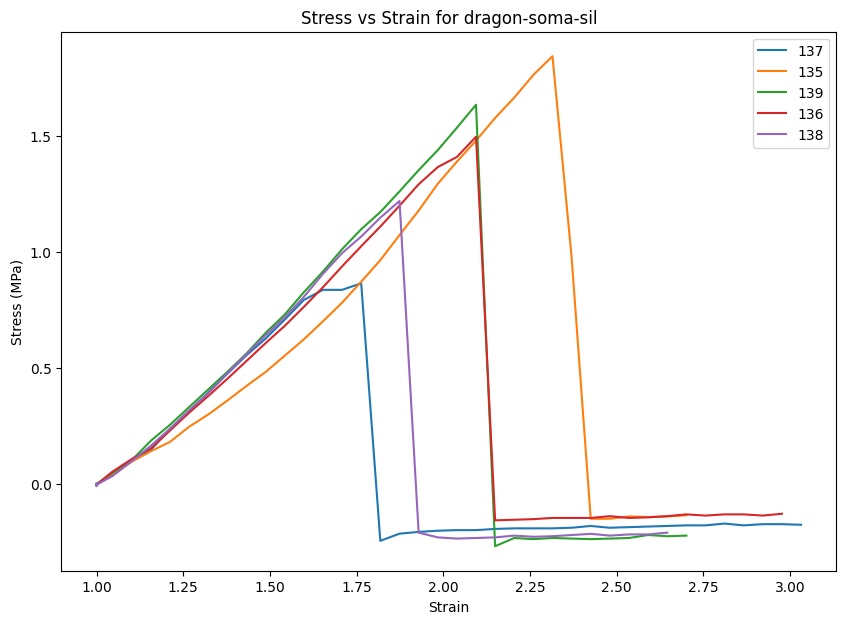

The mean Young's Modulus for material dragon-soma-sil is 1.3291971283245017 MPa
The standard deviation of Young's Modulus for material dragon-soma-sil is 0.1872694011320945 MPa
The Young's Modulus for sample number 159 is 0.9535433551298323 MPa
The Young's Modulus for sample number 161 is 0.8945503463271051 MPa
The Young's Modulus for sample number 163 is 0.8357215580184425 MPa
The Young's Modulus for sample number 162 is 0.7371631845933084 MPa
The Young's Modulus for sample number 160 is 0.7851647860520181 MPa


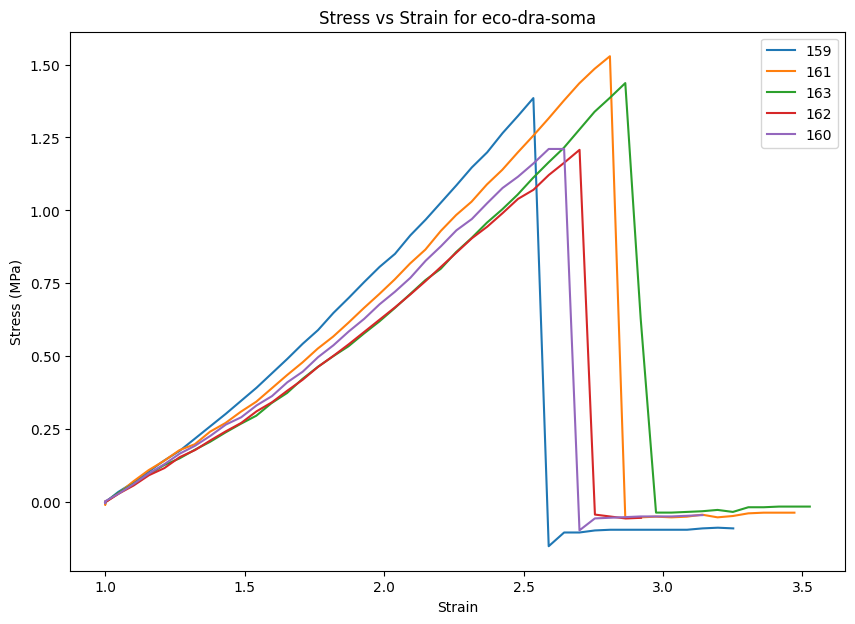

The mean Young's Modulus for material eco-dra-soma is 0.8412286460241413 MPa
The standard deviation of Young's Modulus for material eco-dra-soma is 0.07676053970730481 MPa
The Young's Modulus for sample number 108 is 0.33762594248348565 MPa
The Young's Modulus for sample number 114 is 0.4255874215273193 MPa
The Young's Modulus for sample number 109 is 0.3847348053169032 MPa
The Young's Modulus for sample number 113 is 0.3989229563915854 MPa
The Young's Modulus for sample number 111 is 0.3529242005127963 MPa
The Young's Modulus for sample number 112 is 0.45753951786320596 MPa
The Young's Modulus for sample number 110 is 0.4388028013792392 MPa


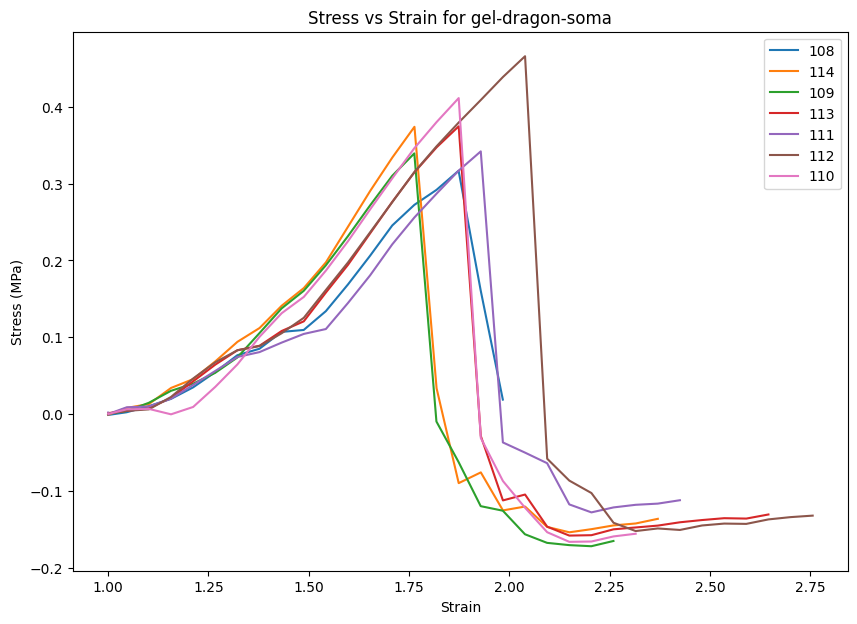

The mean Young's Modulus for material gel-dragon-soma is 0.39944823506779076 MPa
The standard deviation of Young's Modulus for material gel-dragon-soma is 0.04107463360330596 MPa
The Young's Modulus for sample number 125 is 0.2358720111533765 MPa
The Young's Modulus for sample number 129 is 0.26978312692598405 MPa
The Young's Modulus for sample number 128 is 0.24497480020902523 MPa
The Young's Modulus for sample number 126 is 0.2706151637917123 MPa
The Young's Modulus for sample number 127 is 0.20982510589107395 MPa


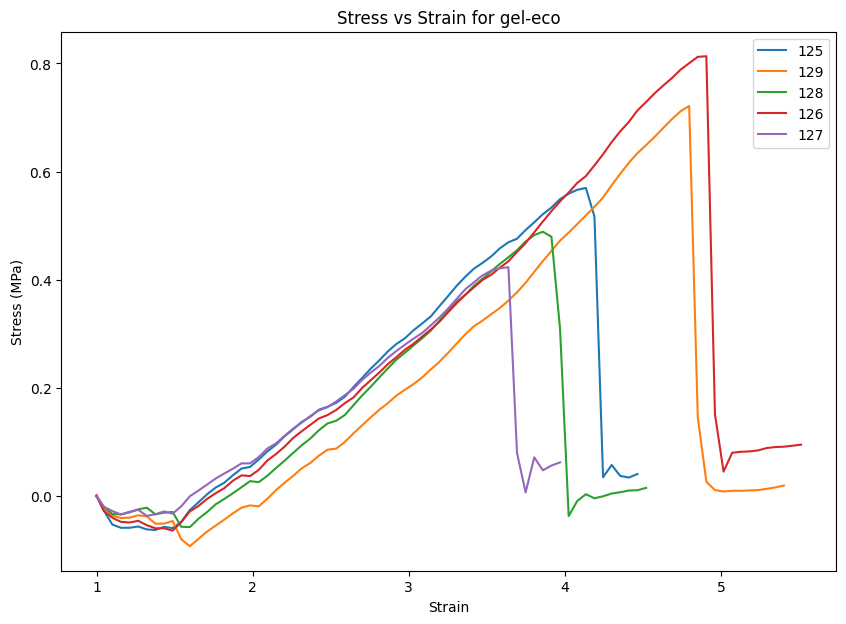

The mean Young's Modulus for material gel-eco is 0.24621404159423443 MPa
The standard deviation of Young's Modulus for material gel-eco is 0.022731319813555643 MPa
The Young's Modulus for sample number 132 is 0.11376998392124858 MPa
The Young's Modulus for sample number 130 is 0.0013333333333333333 MPa
The Young's Modulus for sample number 131 is 0.10600182000251299 MPa
The Young's Modulus for sample number 134 is 0.13064128890139712 MPa
The Young's Modulus for sample number 133 is 0.10420868629823854 MPa


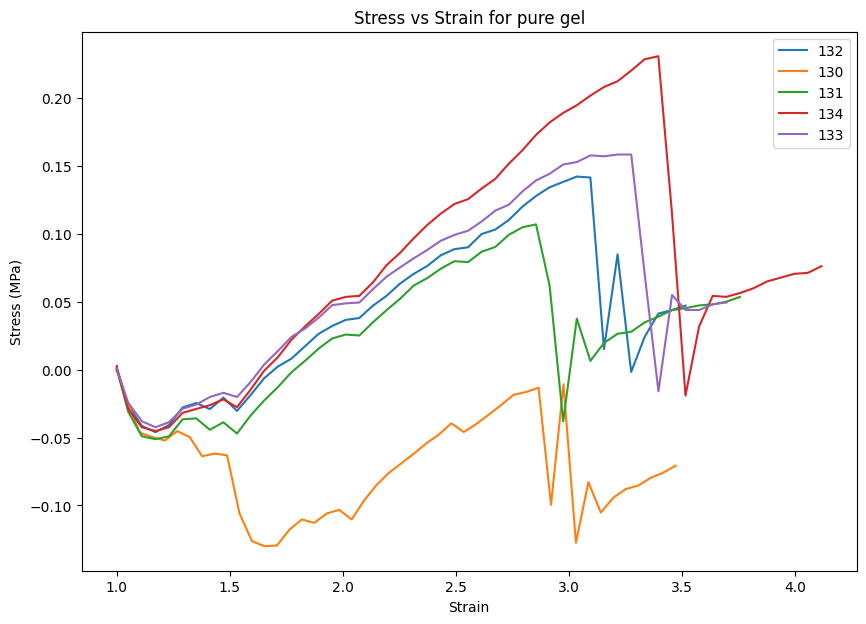

The mean Young's Modulus for material pure gel is 0.09119102249134611 MPa
The standard deviation of Young's Modulus for material pure gel is 0.045889773618533206 MPa
The Young's Modulus for sample number 089 is 2.6649465103153798 MPa
The Young's Modulus for sample number 087 is 2.302476180151648 MPa
The Young's Modulus for sample number 088 is 2.6646699187956253 MPa
The Young's Modulus for sample number 091 is 2.4402001596732026 MPa
The Young's Modulus for sample number 090 is 2.2452713966827726 MPa


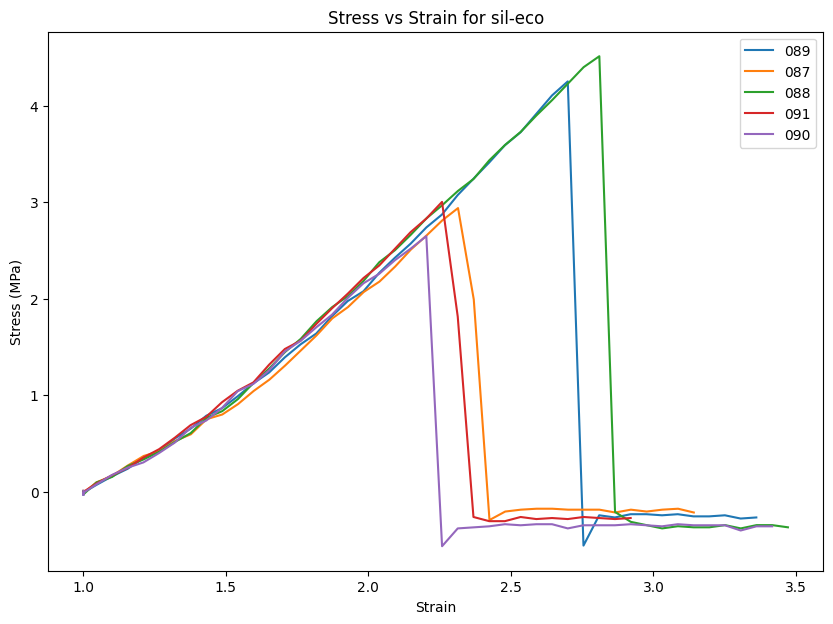

The mean Young's Modulus for material sil-eco is 2.4635128331237257 MPa
The standard deviation of Young's Modulus for material sil-eco is 0.176150678878416 MPa
The Young's Modulus for sample number 151 is 0.8669392527043188 MPa
The Young's Modulus for sample number 150 is 1.209211993140242 MPa
The Young's Modulus for sample number 149 is 1.0464511860882715 MPa
The Young's Modulus for sample number 147 is 1.2055162723147828 MPa
The Young's Modulus for sample number 152 is 1.0872603616664263 MPa
The Young's Modulus for sample number 148 is 1.2767530051846048 MPa


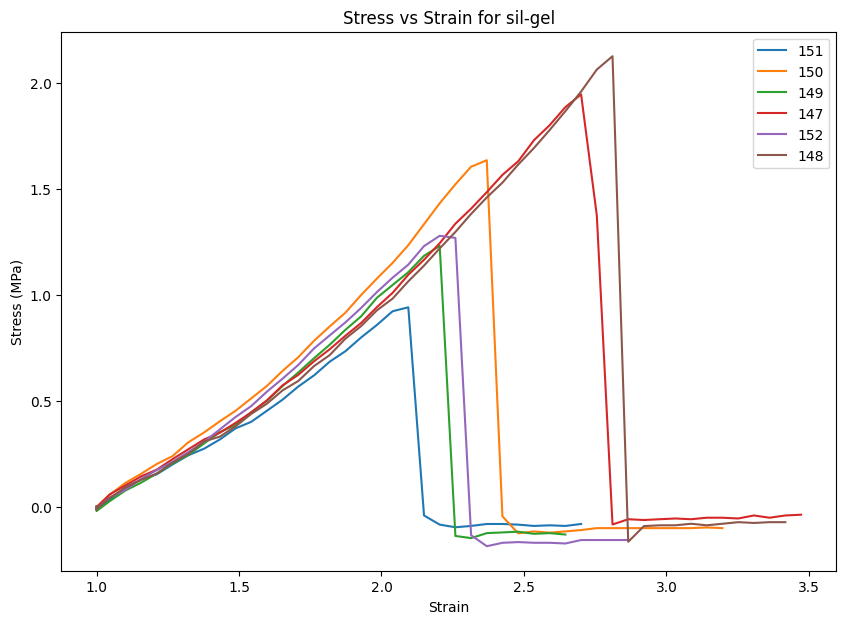

The mean Young's Modulus for material sil-gel is 1.1153553451831077 MPa
The standard deviation of Young's Modulus for material sil-gel is 0.13554515486407154 MPa
The Young's Modulus for sample number 169 is 1.16243567897713 MPa
The Young's Modulus for sample number 164 is 1.1989786493168642 MPa
The Young's Modulus for sample number 167 is 1.2123677651281768 MPa
The Young's Modulus for sample number 166 is 1.2207077382264588 MPa
The Young's Modulus for sample number 168 is 1.102052102797865 MPa
The Young's Modulus for sample number 165 is 1.1789659060147135 MPa


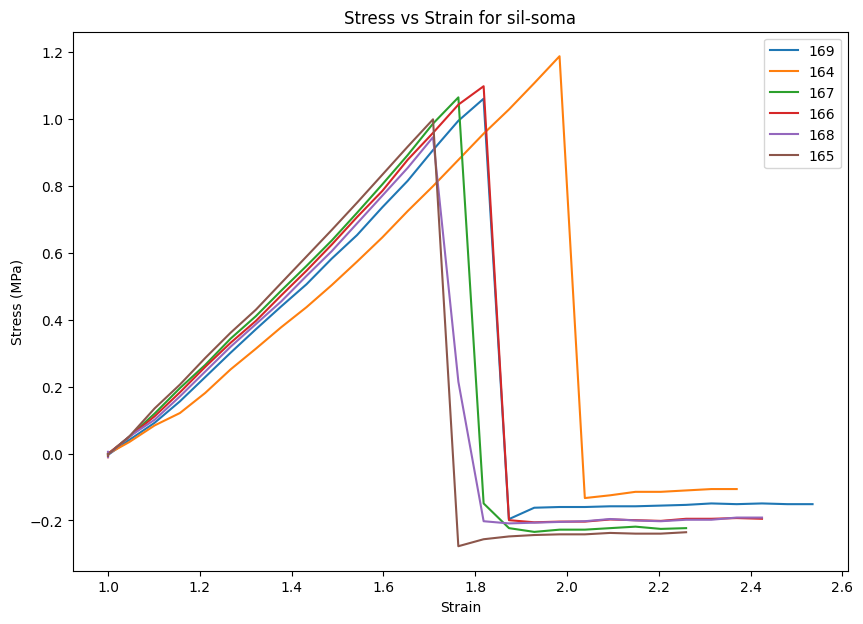

The mean Young's Modulus for material sil-soma is 1.1792513067435346 MPa
The standard deviation of Young's Modulus for material sil-soma is 0.03968011141794888 MPa
The Young's Modulus for sample number 117 is 0.39065058230899724 MPa
The Young's Modulus for sample number 119 is 0.3471557870452389 MPa
The Young's Modulus for sample number 116 is 0.3824089130905826 MPa
The Young's Modulus for sample number 118 is 0.39540082861382503 MPa
The Young's Modulus for sample number 115 is 0.2623457704389874 MPa


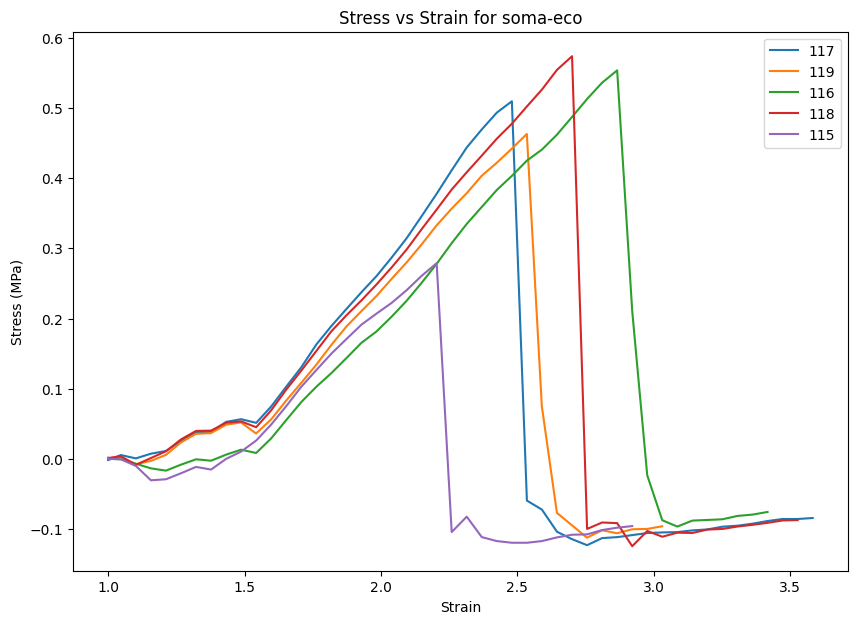

The mean Young's Modulus for material soma-eco is 0.3555923762995262 MPa
The standard deviation of Young's Modulus for material soma-eco is 0.049596416952204576 MPa
The Young's Modulus for sample number 178 is 0.2934550779007395 MPa
The Young's Modulus for sample number 181 is 0.20374273321916117 MPa
The Young's Modulus for sample number 176 is 0.24803428668479438 MPa
The Young's Modulus for sample number 179 is 0.28691682346496117 MPa
The Young's Modulus for sample number 177 is 0.2619165601717828 MPa
The Young's Modulus for sample number 180 is 0.2370395347180513 MPa


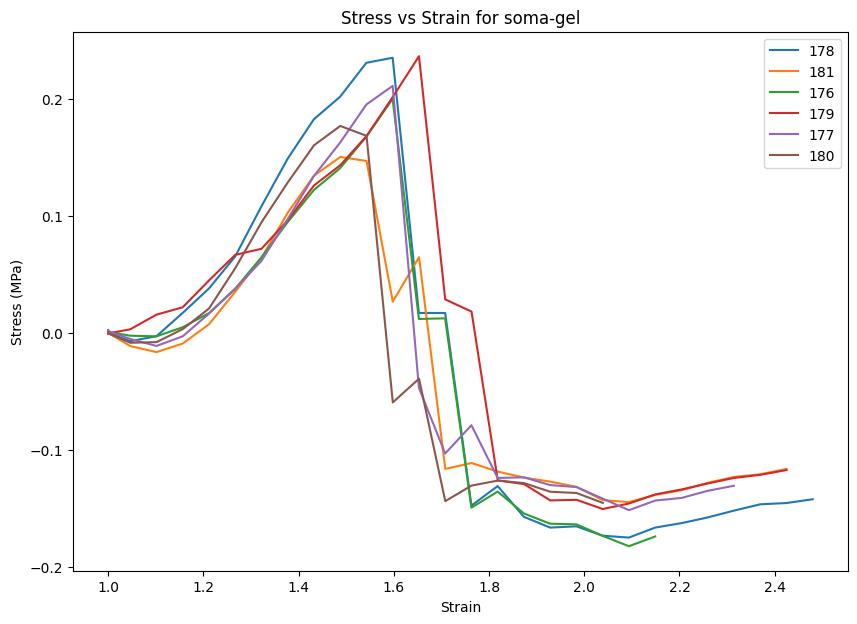

The mean Young's Modulus for material soma-gel is 0.2551841693599151 MPa
The standard deviation of Young's Modulus for material soma-gel is 0.03039604909609236 MPa


In [6]:
# Call the function with specific material names and the lookup table
dra_sil_eco_gel_data, dra_sil_eco_gel_mean, dra_sil_eco_gel_std = process_and_plot_dataframes('dra-sil-eco-gel', lookup_table, thickness_df)
dra_sil_gel_data, dra_sil_gel_mean, dra_sil_gel_std = process_and_plot_dataframes('dra-sil-gel', lookup_table, thickness_df)
dra_soma_data, dra_soma_mean, dra_soma_std = process_and_plot_dataframes('dra-soma', lookup_table, thickness_df)
# BAD DATA
# dragon_eco_data, dragon_eco_mean, dragon_eco_std = process_and_plot_dataframes('dragon-eco', lookup_table, thickness_df)
dragon_gel_data, dragon_gel_mean, dragon_gel_std = process_and_plot_dataframes('dragon-gel', lookup_table, thickness_df)
dragon_soma_sil_data, dragon_soma_sil_mean, dragon_soma_sil_std = process_and_plot_dataframes('dragon-soma-sil', lookup_table, thickness_df)
eco_dra_soma_data, eco_dra_soma_mean, eco_dra_soma_std = process_and_plot_dataframes('eco-dra-soma', lookup_table, thickness_df)
gel_dragon_soma_data, gel_dragon_soma_mean, gel_dragon_soma_std = process_and_plot_dataframes('gel-dragon-soma', lookup_table, thickness_df)
gel_eco_data, gel_eco_mean, gel_eco_std = process_and_plot_dataframes('gel-eco', lookup_table, thickness_df)
pure_gel_data, pure_gel_mean, pure_gel_std = process_and_plot_dataframes('pure gel', lookup_table, thickness_df)
sil_eco_data, sil_eco_mean, sil_eco_std = process_and_plot_dataframes('sil-eco', lookup_table, thickness_df)
sil_gel_data, sil_gel_mean, sil_gel_std = process_and_plot_dataframes('sil-gel', lookup_table, thickness_df)
sil_soma_data, sil_soma_mean, sil_soma_std = process_and_plot_dataframes('sil-soma', lookup_table, thickness_df)
soma_eco_data, soma_eco_mean, soma_eco_std = process_and_plot_dataframes('soma-eco', lookup_table, thickness_df)
soma_gel_data, soma_gel_mean, soma_gel_std = process_and_plot_dataframes('soma-gel', lookup_table, thickness_df)
#Need data below
# dra_eco_gel_data, dra_eco_gel_mean, dra_eco_gel_std = process_and_plot_dataframes('dra-eco-gel', lookup_table, thickness_df)
# dra_sil_gel_eco_soma_data, dra_sil_gel_eco_soma_mean, dra_sil_gel_eco_soma_std = process_and_plot_dataframes('dra-sil-gel-eco-soma', lookup_table, thickness_df)
# sil_gel_eco_soma_data, sil_gel_eco_soma_mean, sil_gel_eco_soma_std = process_and_plot_dataframes('sil-gel-eco-soma', lookup_table, thickness_df)
# dra_eco_gel_soma_data, dra_eco_gel_soma_mean, dra_eco_gel_soma_std = process_and_plot_dataframes('dra-eco-gel-soma', lookup_table, thickness_df)
# eco_gel_soma_data, eco_gel_soma_mean, eco_gel_soma_std = process_and_plot_dataframes('eco-gel-soma', lookup_table, thickness_df)
# dra_sil_gel_soma_data, dra_sil_gel_soma_mean, dra_sil_gel_soma_std = process_and_plot_dataframes('dra-sil-gel-soma', lookup_table, thickness_df)
# sil_eco_soma_data, sil_eco_soma_mean, sil_eco_soma_std = process_and_plot_dataframes('sil-eco-soma', lookup_table, thickness_df)
# dra_sil_eco_soma_data, dra_sil_eco_soma_mean, dra_sil_eco_soma_std = process_and_plot_dataframes('dra-sil-eco-soma', lookup_table, thickness_df)



# process_and_plot_dataframes('sil-eco', lookup_table, thickness_df)

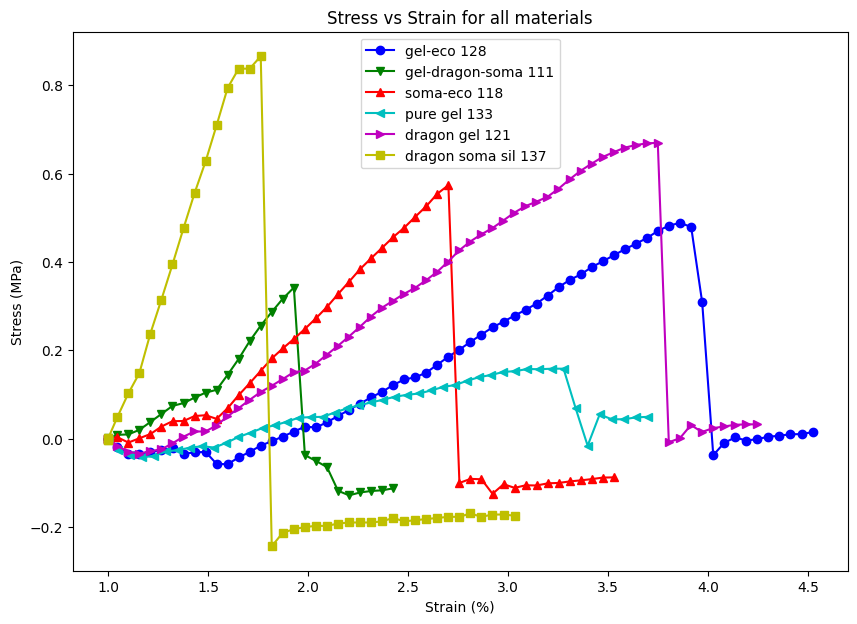

In [7]:
import random

colors = ['b', 'g', 'r', 'c', 'm', 'y']
markers = ['o', 'v', '^', '<', '>', 's']

# Create the figure
fig_force_displacement = plt.figure(figsize=(10, 7))
ax_force_displacement = fig_force_displacement.add_subplot(111)

# Define your dictionaries
dictionaries = [gel_eco_data, gel_dragon_soma_data, soma_eco_data, pure_gel_data, dragon_gel_data, dragon_soma_sil_data]
labels = ['gel-eco', 'gel-dragon-soma', 'soma-eco', 'pure gel', 'dragon gel', 'dragon soma sil']

# Plot a random sample from each material
for data, label, marker, color in zip(dictionaries, labels, markers, colors):
    sample_number = random.choice(list(data.keys()))
    ax_force_displacement.plot(data[sample_number]['strain'], data[sample_number]['stress'], marker=marker, linestyle='-', color=color, label=f'{label} {sample_number}')

ax_force_displacement.set_xlabel('Strain (%)')
ax_force_displacement.set_ylabel('Stress (MPa)')
ax_force_displacement.set_title(f'Stress vs Strain for all materials')
ax_force_displacement.legend()

plt.show()

fig_force_displacement.savefig('line_plot.png', dpi=300)


# For BMES

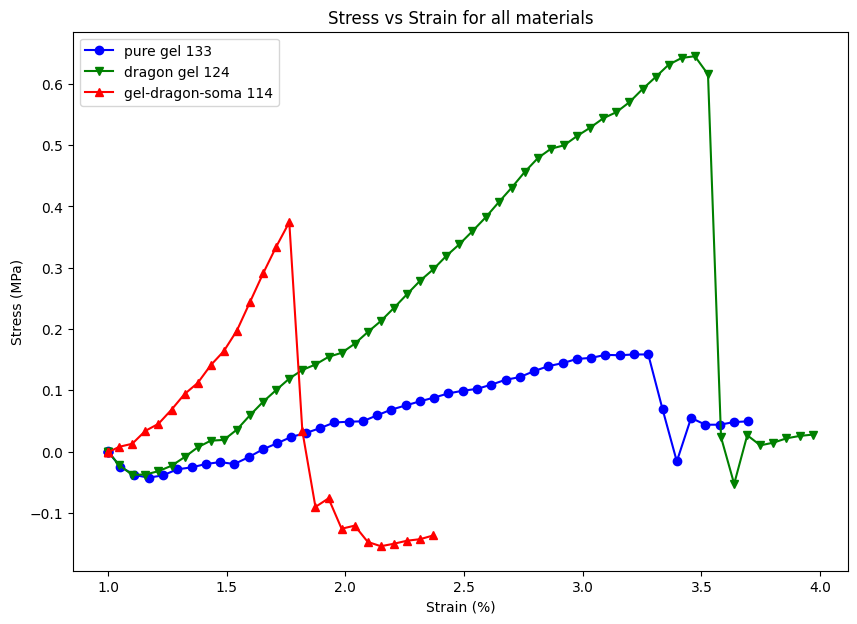

In [8]:
#create plot for pure gel, dragon gel, and gel dragon soma
fig_force_displacement = plt.figure(figsize=(10, 7))
ax_force_displacement = fig_force_displacement.add_subplot(111)

# Define your dictionaries
dictionaries = [pure_gel_data, dragon_gel_data, gel_dragon_soma_data]
labels = ['pure gel', 'dragon gel', 'gel-dragon-soma']

# Plot a random sample from each material
for data, label, marker, color in zip(dictionaries, labels, markers, colors):
    sample_number = random.choice(list(data.keys()))
    ax_force_displacement.plot(data[sample_number]['strain'], data[sample_number]['stress'], marker=marker, linestyle='-', color=color, label=f'{label} {sample_number}')

ax_force_displacement.set_xlabel('Strain (%)')
ax_force_displacement.set_ylabel('Stress (MPa)')
ax_force_displacement.set_title(f'Stress vs Strain for all materials')
ax_force_displacement.legend()

plt.show()

fig_force_displacement.savefig('line_plot_ind.png', dpi=300)



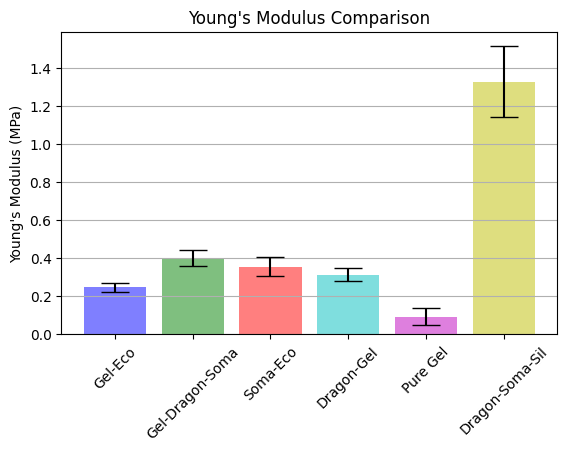

In [9]:
colors = ['b', 'g', 'r', 'c', 'm', 'y']

#create bar plots for all plotted young's modulus material comparison
materials = ['Gel-Eco', 'Gel-Dragon-Soma', 'Soma-Eco', 'Dragon-Gel', 'Pure Gel', 'Dragon-Soma-Sil']
x_pos = np.arange(len(materials))
CTEs = [gel_eco_mean, gel_dragon_soma_mean, soma_eco_mean, dragon_gel_mean, pure_gel_mean, dragon_soma_sil_mean]
error = [gel_eco_std, gel_dragon_soma_std, soma_eco_std, dragon_gel_std, pure_gel_std, dragon_soma_sil_std]

fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10, color=colors)
ax.set_ylabel("Young's Modulus (MPa)")
ax.set_xticks(x_pos)
ax.set_xticklabels(materials, rotation=45)
ax.set_title("Young's Modulus Comparison")
ax.yaxis.grid(True)

plt.subplots_adjust(bottom=0.25)
fig.savefig('bar_plot.png', dpi=300)
